# Big_Mart Data Analysis and Visualization
The project is aimed at looking and finding deep insights of the BigMart 2013 sales data for 1559 products across 10 stores in different cities. The report also aims in bringing us to a conclusion about the sales of each product at a particular store..

The data used is based on the sales of 2003 collected by the data scientists at BigMart. The features of the dataset are as follows ,

This dataset has 12 columns which contains 6 variables about items , 5 variables about the outlets and 1 of Item Outlet sales. The dataset are of the size 8524. The tools and libraries used for the data set are ,

1.Python
2.scikit-learn / sklearn
3.Pandas
4.NumPy
5.Matplotlib
6.Seaborn

. The libraries are used for visualization and machine learning models which can help us to come to conclusion.

## Data Description
The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.

All items are sold in a particular outlet. Data are collected on 12 different properties of the items and the outlets one of which is Item_Outlet_Sales, and the rest include Item Identifier, Item Weight, Item Fat Content, Item Visibility, Item Type, Item MRP, Outlet Identifier etc.

## Attributes :
•	Item_Identifier
•	Item_Weight
•	Item_Fat_Content
•	Item_Visibility
•	Item_Type
•	Item_MRP
•	Outlet_Identifier
•	Outlet_Establishment_Year
•	Outlet_Size
•	Outlet_Location_Type
•	Outlet_Type
•	Item_Outlet_Sales


In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.describe()
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
Big_Mart = pd.concat([train, test], sort = False)
print(train.shape, test.shape, Big_Mart.shape)

(8523, 13) (5681, 13) (14204, 13)


Now, we will view our imported data frame by making use of the head function to show first 5 rows.

In [7]:
Big_Mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
categorial_features = Big_Mart.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [9]:
numerical_features = Big_Mart.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


# DATA CLEANING


In [10]:
Big_Mart.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [11]:
Big_Mart.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Here, we will view the features including null values with differnt color in our data frame by making use of the Heat map and seaborn library.

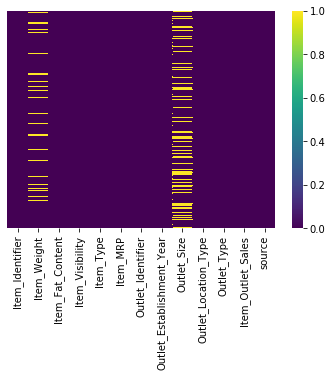

In [12]:
sns.heatmap(Big_Mart.isnull(),yticklabels=False,cmap="viridis")

For viewing the count of rows containing the particular feature in Big_Mart Data frame

In [14]:
item_avg_weight = Big_Mart.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = Big_Mart['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

Big_Mart.loc[missing_values,'Item_Weight']  = Big_Mart.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after imputation: %d' %sum(Big_Mart['Item_Weight'].isnull()))

Missing values: 2439
Missing values after imputation: 0


In [15]:
from scipy.stats import mode

#Determing the mode for each
mode_is=Big_Mart['Outlet_Size'].mode()
print (mode_is)
outlet_size_mode = Big_Mart.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=lambda x: x.mode().iat[0])
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = Big_Mart['Outlet_Size'].isnull() 
print(miss_bool)
#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal missing:%d' %sum(miss_bool))

Big_Mart.loc[miss_bool,'Outlet_Size'] = Big_Mart.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
miss_values = Big_Mart['Outlet_Size'].isnull()
print ('\nMissing Values after imputation:%d' %sum(miss_values))


0    Medium
dtype: object
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
5651    False
5652     True
5653    False
5654    False
5655    False
5656    False
5657    False
5658    False
5659    False
5660    False
5661    False
5662     True
5663    False
5664    False
5665    False
5666    False
5667    False
5668     True
5669    False
5670     True
5671    False
5672    False
5673    False
5674    False
5675    F

In [16]:
#Determine average visibility of a product
visibility_avg = Big_Mart.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (Big_Mart['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
Big_Mart.loc[missing_values,'Item_Visibility'] = Big_Mart.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(Big_Mart['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [17]:
#Change categories of low fat:
print('Original Categories:')
print(Big_Mart['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
Big_Mart['Item_Fat_Content'] = Big_Mart['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(Big_Mart['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [18]:
#Get the first two characters of ID:
Big_Mart['Item_Type_Combined'] = Big_Mart['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
Big_Mart['Item_Type_Combined'] = Big_Mart['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
Big_Mart['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

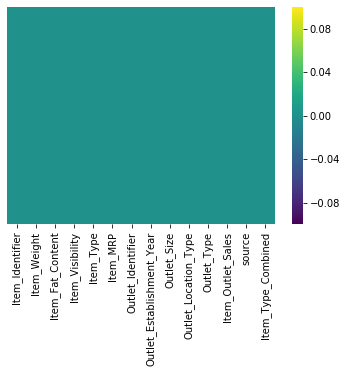

In [19]:
sns.heatmap(Big_Mart.isnull(),yticklabels=False,cmap="viridis")

 Now, our data is clean and ready for the visualizations and analysis.

## Univariate Analysis
Uni means one. Univariate means one variable analysis. The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.

In [20]:
Big_Mart['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

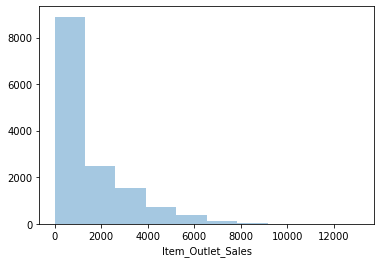

In [21]:
sns.distplot(Big_Mart['Item_Outlet_Sales'],kde=False,bins=10)

The outlet sales distplot represents that the highest number of sales were 9000.

In [22]:
Big_Mart['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

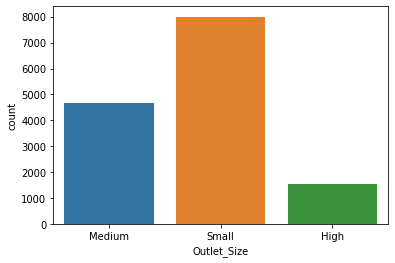

In [23]:
sns.countplot('Outlet_Size',data=Big_Mart)

The above countplot of Outlet_Size shows that the small outlets are 8000 in number whereas the outlet size indicated as high are 1500 in number

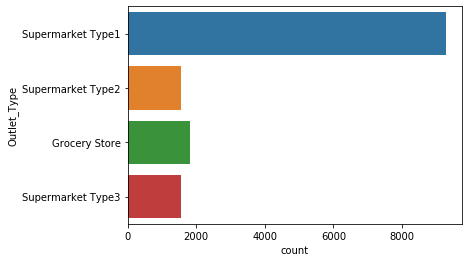

In [25]:
sns.countplot(y='Outlet_Type',data=Big_Mart)

The Outlet_Type countplot shows that the Supermarket Type1 are higheest in count almost equal to 9000 whereas,
the supermarket type 3 is lower in number.

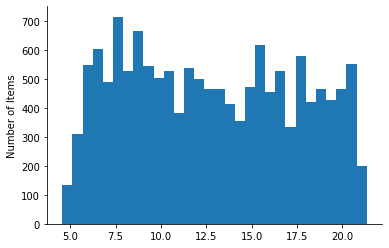

In [26]:
plt.hist(x="Item_Weight",data=Big_Mart,bins=30)
plt.ylabel('Number of Items')
sns.despine()

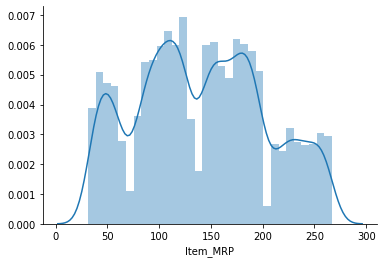

In [27]:
sns.distplot(Big_Mart['Item_MRP'])
sns.despine()

The distplot of Item_MRP indicates that,
the item with MRP between 70 and 140 are higher in number
the items with MRP between 200 and 260 are lowest in number

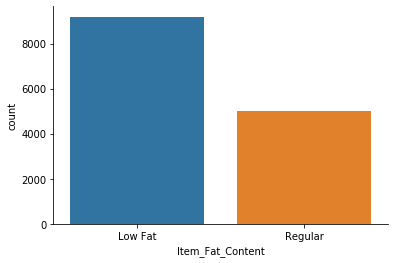

In [28]:
sns.countplot(x='Item_Fat_Content', data=Big_Mart)
sns.despine()

The above count plot of Item_Fat_content revels that the low fat items are approximately double the Items with Regual fat content.

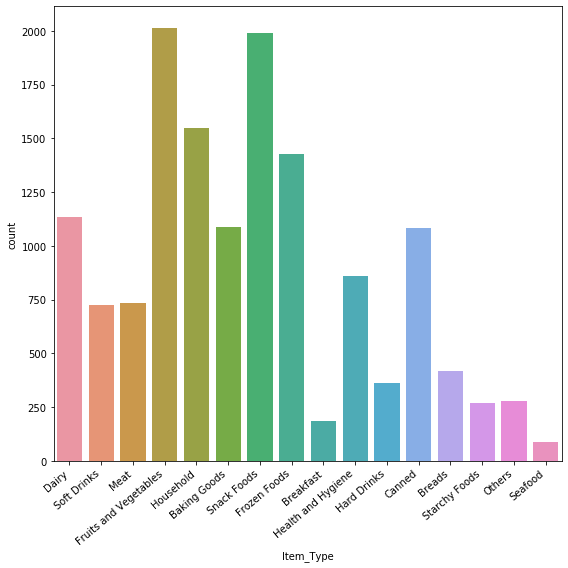

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Item_Type', data=Big_Mart)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

The count plot of Item_Type reveals that,
the Fruits and vegetables are highest in nummber equal to 2000,followed by snack foods almlst equal to 1900.
the seafood items are loeast in number equal to 100.

# Biavariate Analysis
Two variable analysis. We want to find out the relationship between two points. Explore the data.

In [30]:
Big_Mart.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.022028,0.035751,0.000247,0.021262
Item_Visibility,-0.022028,1.000000,-0.007550,-0.084481,-0.074001
Item_MRP,0.035751,-0.007550,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000247,-0.084481,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.021262,-0.074001,0.342781,-0.029489,1.000000


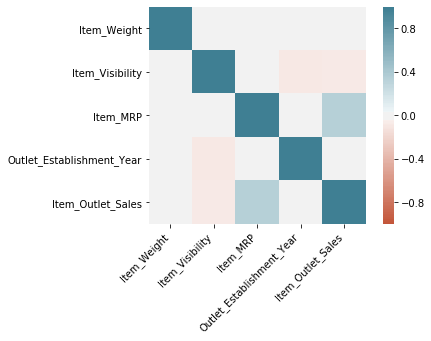

In [31]:
corr = Big_Mart.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


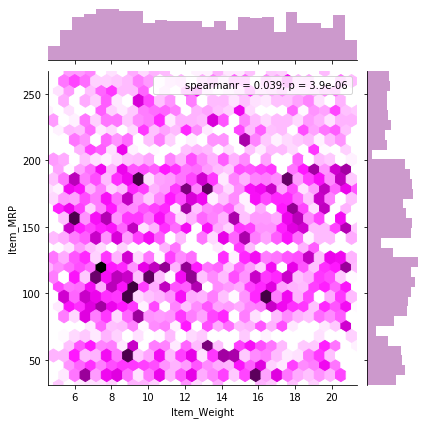

In [32]:
from scipy.stats import spearmanr
sns.jointplot(x='Item_Weight',y='Item_MRP',data=Big_Mart, kind='hex',stat_func=spearmanr,color='purple')

The above graph clearly shows that,

Item_MRP and Item_Weight are having correlation coefficient of 0.039.
The Item_Weight and Item_MRP goes similarly with repect to each other.

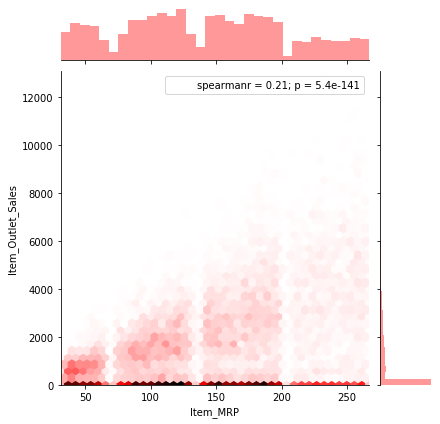

In [34]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=Big_Mart, kind='hex',stat_func=spearmanr,color='RED')

The above graph clearly shows that,

Item_Outlet_Sales and Item_MRP are having correlation coefficient of 0.34.
Higher the MRP of the item higher will be its sale.
The item with sales greater than 6000 have MRP greater than 200.

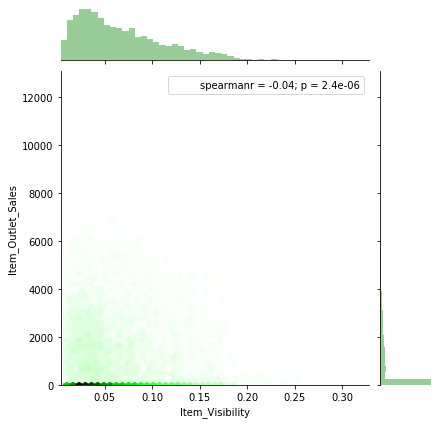

In [35]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=Big_Mart, kind='hex',stat_func=spearmanr,color='green')

It can be seen from above plot that ,

Item_Outlet_Sales and Item_Visibility are having correlation coefficient of -0.04.
As the number of sales for an item increases the item visibility decreases.
No item with sales greater than or equal to 4000 has item visibility greater than 0.20.

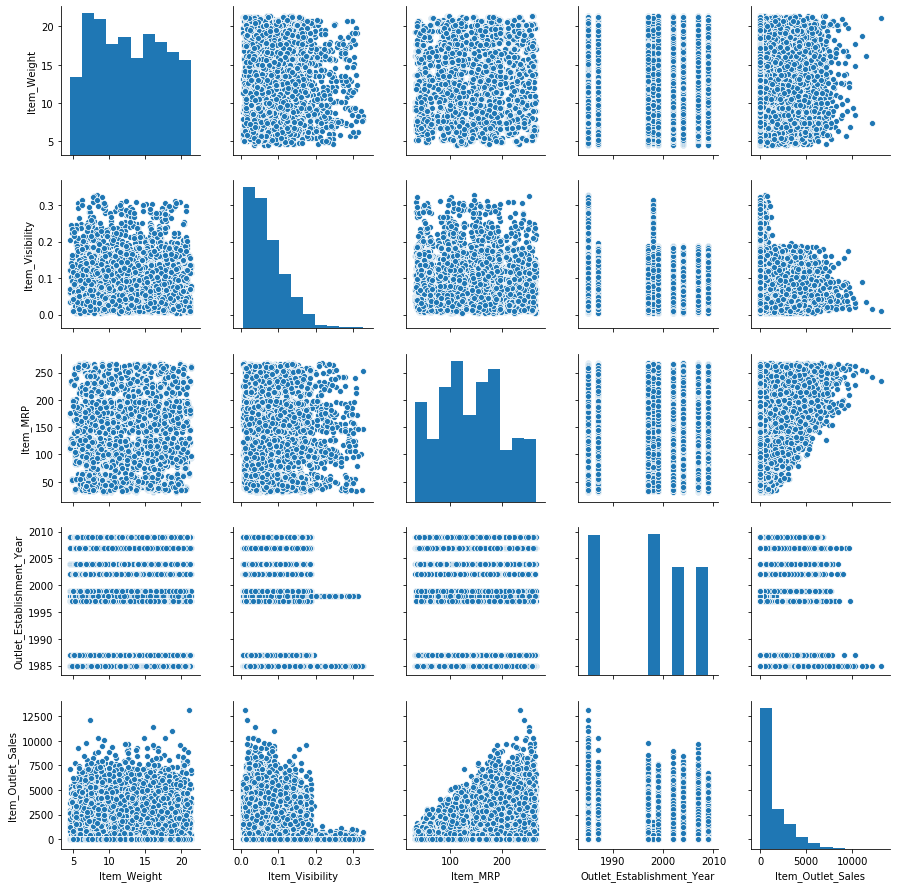

In [36]:
sns.pairplot(Big_Mart)

C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


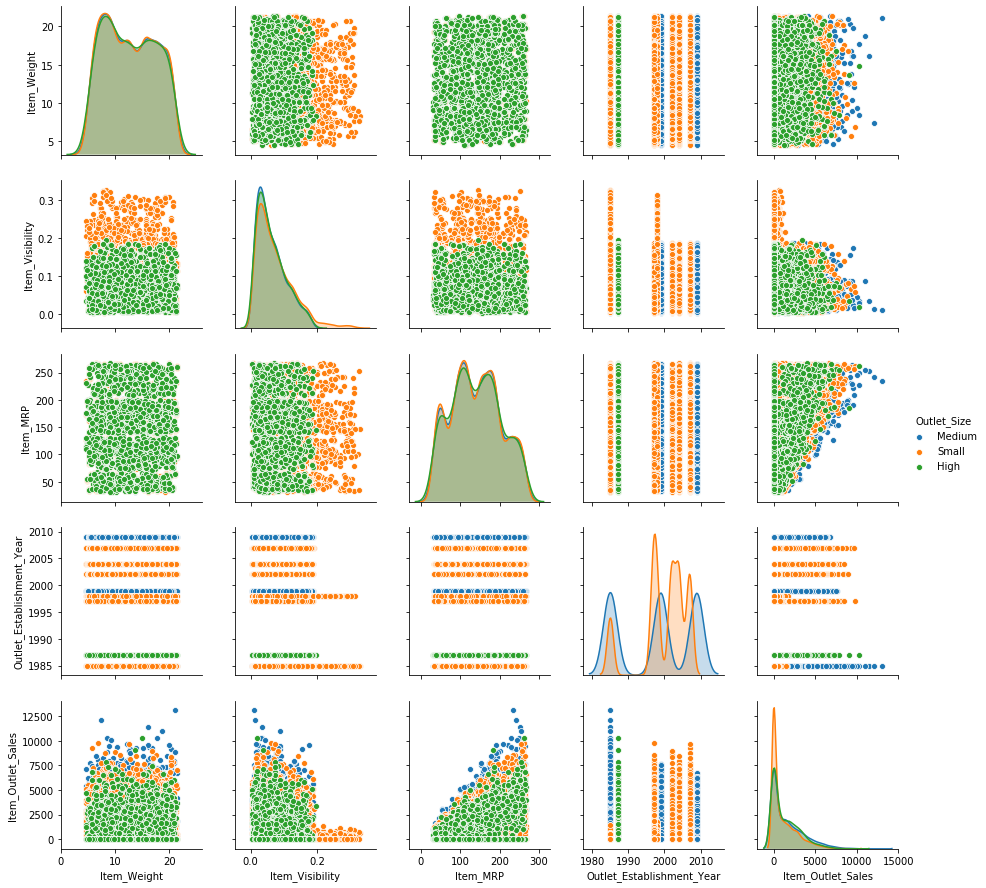

In [37]:
sns.pairplot(Big_Mart,hue='Outlet_Size')

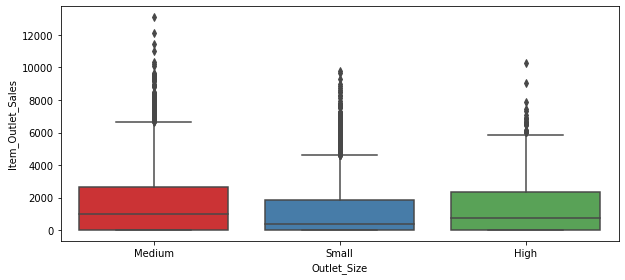

In [38]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

The graph between Item_Outlet_Sales and Outlet_Size reveals that,
the Medium outlet_Size has highest number of Item_Outlet_Sales that is almost equal to 2500.
the small outlet size has laest number of sales equal to 1800 approximately.

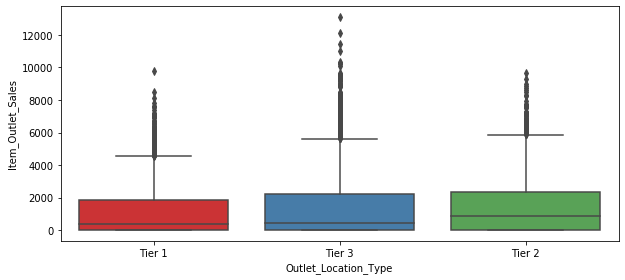

In [39]:
plt.figure(figsize = (10,9))

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

The graph between Item_Outlet_Sales and Outlet_Location_Type represents that,
The tier 3 and tier 2 has equal number of sales that is 2000
The tier 1 has least number of sales that is approximately 1900.

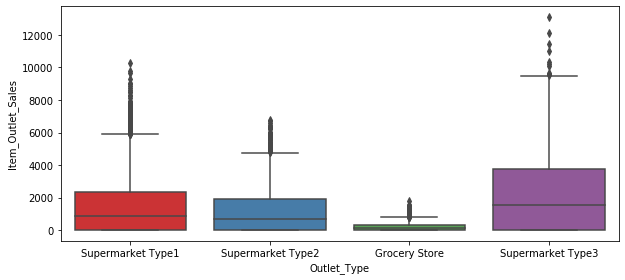

In [40]:
plt.figure(figsize = (10,9))

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

The above graph between Outlet_Type and Item_Outlet_Sales clearly reveals that,
the supermarket Type3 has higher number of sales that is almost 4000.
the grocery store has minimum number of sales that is approximately 200. 

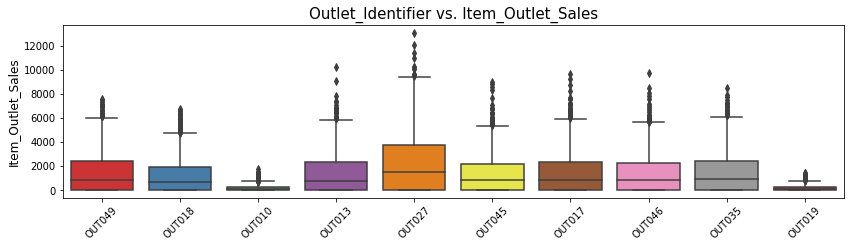

In [41]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

The Outlet_Identifier vs Item_Outlet_Sales shows that the out027 were having highest sales equal to 4000 and out019 and out010 were least in number.

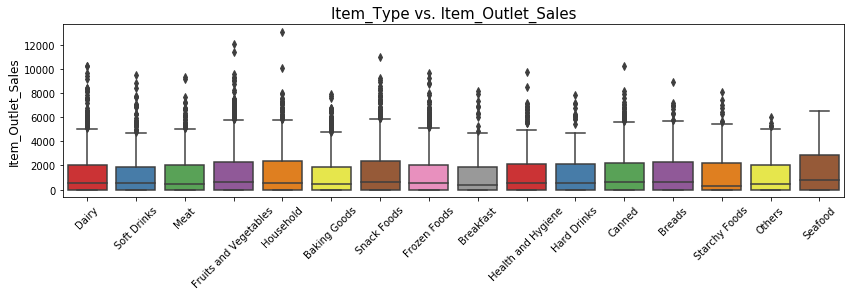

In [42]:
plt.figure(figsize = (14,9))

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

The above graph clearly shows that,
The sales were at peak that is approximately 2800 for the Seafood followed by Snack foods that is 2000.
The sales were lowest for Baking goods that is 1500.

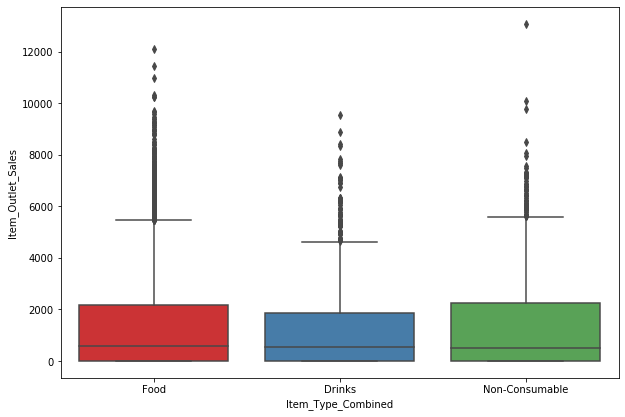

In [43]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show()

The above graph clearly indicates that 
the Non-Consumable and food were similar in sales that is 2000.
The drinks were less in sales as compared to other products.

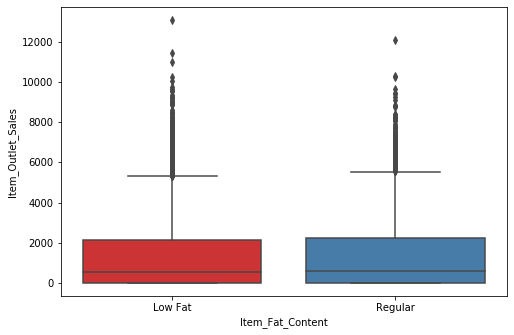

In [44]:
plt.figure(figsize = (8,7))

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

From above graph,it is clear that the Items with Regular fat content are consumed slightly more than Low Fat Item

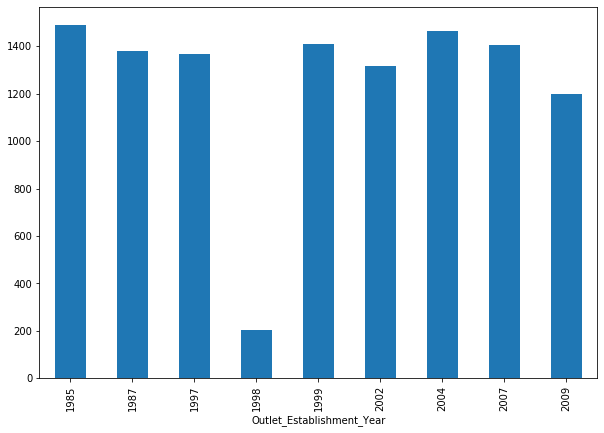

In [45]:
plt.figure(figsize = (10,9))

plt.subplot(212)

Big_Mart.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()


The above graph clearly shows that,

Item_Outlet_Sales and Outlet Establishment Year are having correlation coefficient of -0.029.
Maximum sales were there in year 1985 and the sales decreased to lowest point that is 200 in 1998.
The variety of items sold is also maximum for 1985 followed by 2004.
There were almost no sales between years 1990 and 1995.

# Multivariate Analysis
Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

## Item Outlet Sales vs Outlet years in terms of Item Fat Content.

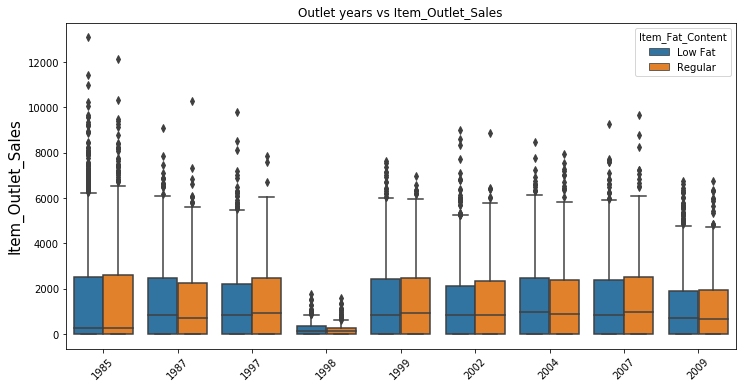

In [46]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales',hue='Item_Fat_Content',data = Big_Mart)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

From the above graph, it is concluded that items of Regular fat_Content were sold more than the Low Fat items for all the years except for the year 1987 and 1998.

In [47]:
Big_Mart.to_csv('output_BigMart.csv')

# Summary
From the above analysis it is concluded that items with median weight i.e 12.5 were sold the most and were more than 1600 in number where as items were any other weight were not sold more than 400 pieces. Most items sold were of price 100 to 200 and items with price above 200 were having least sale. The number of items with regular fat is almost have that of the low fat. Most of the items are having sales around 200 to 2000. Higher the MRP of the item higher will be its sale. Maximum sales were there in year 1985. The Low fat item were sold more than the regular items except for the year 1987 and 2009.

# Feature Engineering

In [48]:
Big_Mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [49]:
## Dropo the "Item Identifier" feature as it does not play any role in prediction
df = Big_Mart.drop(['Item_Identifier'],axis=1)

In [50]:
df =df.drop(['source'],axis=1)

In [52]:
df=df.drop(['Item_Type_Combined'],axis=1)

In [53]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [54]:
df_linear=pd.get_dummies(df,columns=['Outlet_Identifier'])

In [55]:
df_linear.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.017834,182.0950,1998,732.3800,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.009780,53.8614,1987,994.7052,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
labels_linear=df['Item_Outlet_Sales']

In [58]:
## Droping the "Item Outlet Sale" as it the target to be predicted
df_linear=df_linear.drop(['Item_Outlet_Sales'],axis=1)

# Linear Regression

In [63]:
# spliting the data into training and test sample
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_linear, labels_linear, test_size=0.30, random_state = 0)

# Importing the linear regression model
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
#model fitting
model_linear.fit(x_train, y_train)

# Checking the model accuracy
model_linear.score(x_test,y_test)

0.21017076236938384

# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0674071745889051

# Gradient Boosting Regressor

In [61]:
from sklearn import ensemble
params = {'n_estimators': 350, 'max_depth': 4, 'min_samples_split': 0.08,
          'learning_rate': 0.01, 'loss': 'ls'}
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(x_train, y_train)
model3.score(x_test,y_test)

0.22425281604298475